# Self-Organizing Maps (SOM)
 ## Segmentação de imagens
* Neste exemplo, apenas uma imagem é carregada e construido uma matriz de pixels que terá a seguinte aparência:
  
  \begin{bmatrix}
    r_1 & g_1 & b_1 \\\
    \vdots & \vdots & \vdots \\\
    r_n & g_n & b_n
  \end{bmatrix}
  
* Nesta matriz, cada linha representa a cor de um determinado pixel da imagem no espaço RGB e as colunas representam a intensidade em uma cor específica. Esta matriz é usada para treinar o SOM e então é feito uma "quantização" do conjunto original de cores para obter um conjunto menor de cores que irá segmentar a imagem em áreas uniformes.



In [1]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Leitura da imagem e criação da matriz de pixel

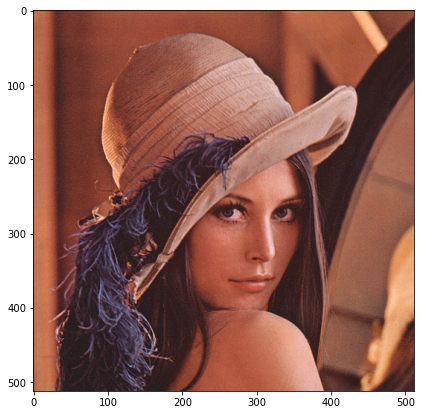

In [2]:
# read the image
#img = plt.imread('tree.jpg')
#img = cv2.imread('CT_img_clean.png')
img = plt.imread('lena.png')
# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0] * img.shape[1], 3)) #/ 255.

plt.figure(figsize=(7, 7))
plt.imshow(img)
plt.show()

In [3]:
print("Shape image original: " + str(img.shape))
print("Shape matriz de pixel: " + str(pixels.shape))
print("pixel 0: " + str(pixels[0]))

Shape image original: (512, 512, 3)
Shape matriz de pixel: (262144, 3)
pixel 0: [0.75686276 0.43529412 0.2901961 ]


## Treinamento do SOM

In [4]:
# SOM initialization and training
print('training...')
som = MiniSom(x = 2, y = 3, input_len = 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble', activation_distance='euclidean')  

som.random_weights_init(pixels)

starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image

print('building new image...')
clustered = qnt.reshape(img.shape[0], img.shape[1], 3)
print('done.')
# O erro de quantização é calculado como a média da distância entre cada amostra de entrada e sua melhor unidade correspondente.

training...
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.11181194735409801
quantization...
building new image...
done.


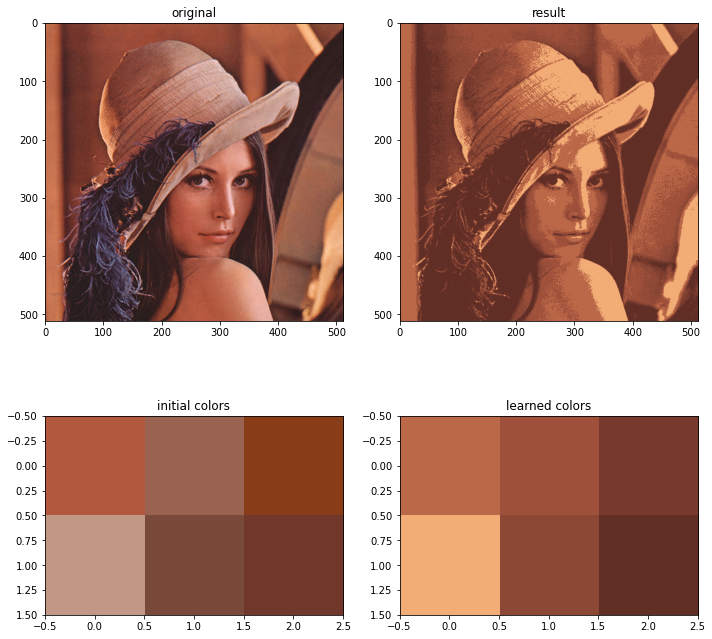

In [5]:
# show the result
plt.figure(figsize=(10, 10))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.savefig('som_color_quantization.png')
plt.show()